#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
sinasc[['APGAR5']].value_counts()

APGAR5
9.0       16076
10.0       8393
8.0        1994
7.0         241
6.0          79
5.0          45
1.0          24
4.0          23
2.0          18
0.0          17
3.0          15
Name: count, dtype: int64

In [5]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'cat_APGAR5'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] > 3) & (sinasc['APGAR5'] <= 5),
           'cat_APGAR5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5) & (sinasc['APGAR5'] <= 7),
           'cat_APGAR5'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] > 7), 'cat_APGAR5'] = 'normal'

In [6]:
sinasc[['cat_APGAR5']].value_counts()

cat_APGAR5      
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

In [7]:
sinasc[['GESTACAO']].value_counts()

GESTACAO           
37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

C:\Users\Eric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


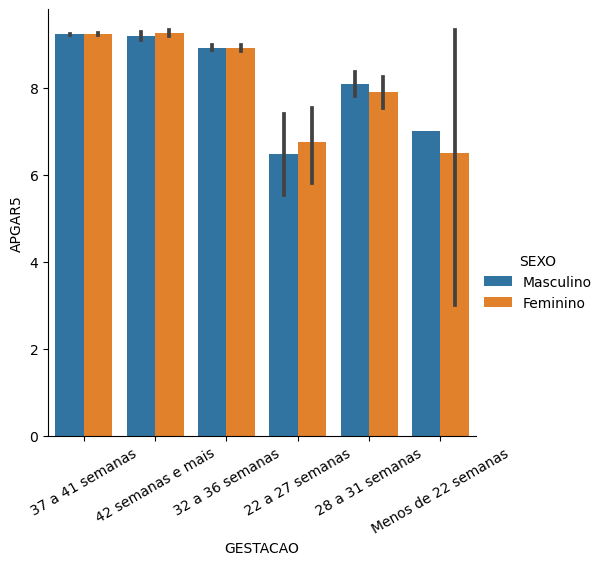

In [29]:
graf = sns.catplot(x='GESTACAO', y='APGAR5'
            , hue = 'SEXO'
            , kind='bar'
            , data=sinasc
        )
graf.set_xticklabels(rotation=30)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [18]:
freq = pd.crosstab (sinasc['GESTACAO'], sinasc['cat_APGAR5'] )
freq

cat_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [19]:
freq_pctlin = freq.div(freq.sum(axis=1), axis = 0)
freq_pctlin

cat_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


In [20]:
freq_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

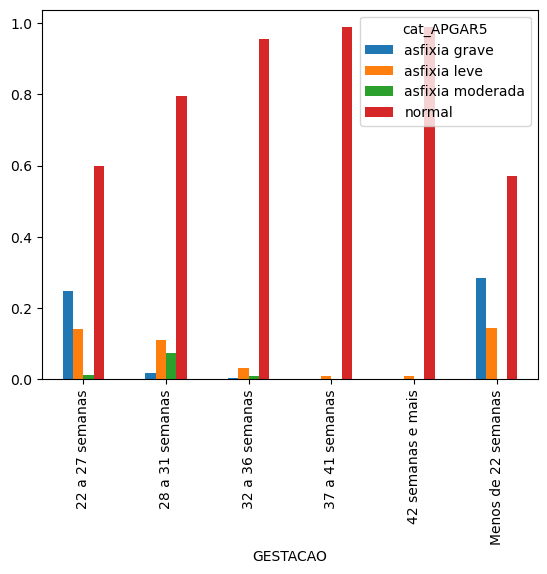

In [21]:
freq_pctlin.plot.bar()

De acordo com o gráfico pode-se visualizar que semanas menores que 37 há um aumento na porcentagem de asfixia, assim como quanto menor a quantidade de semanas a barra de asfixia grave tende a aumentar. Assim, os dados corroboram com a afirmação dos médicos.

### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

C:\Users\Eric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


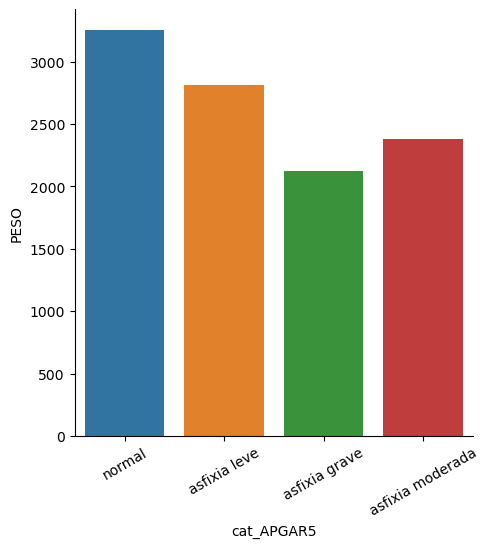

In [31]:
g = sns.catplot(x='cat_APGAR5', y='PESO'
            , kind='bar'
            , errorbar=None,
            data=sinasc
           )
g.set_xticklabels(rotation=30)